In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import scipy.stats
#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3


In [10]:
#분할표 사용 - 범주형과 범주형 데이터의 분포르 확인
lc_loans =pd.read_csv('../0822/python_statistics-main/data/lc_loans.csv')
#print(lc_loans.head())

#grade 별로 status의 개수를 확인
#margin은 뷰 프로그래밍에서 컨텐츠와 컨텐츠 사이의 여백
#통계 분야에서는 전체에 관련된 집계 데이터를 의미함
crosstab = lc_loans.pivot_table(index='grade', columns = 'status',
                               aggfunc=lambda x:len(x),margins=True )
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [11]:
#grade의 비율을 표시하기 위한 교차 분할 표
df = crosstab.copy().loc['A':'G'] #복제
df.loc[:,'Charged Off':'Late'].div(df['All'],axis=0)
df['All'] = df['All']/ sum(df['All'])

print(df)

status  Charged Off  Current  Fully Paid  Late    All
grade                                                
A              1562    50051       20408   469  0.161
B              5302    93852       31160  2056  0.294
C              6023    88928       23147  2777  0.268
D              5007    53281       13681  2308  0.165
E              2842    24639        5949  1374  0.077
F              1526     8444        2328   606  0.029
G               409     1990         643   199  0.007


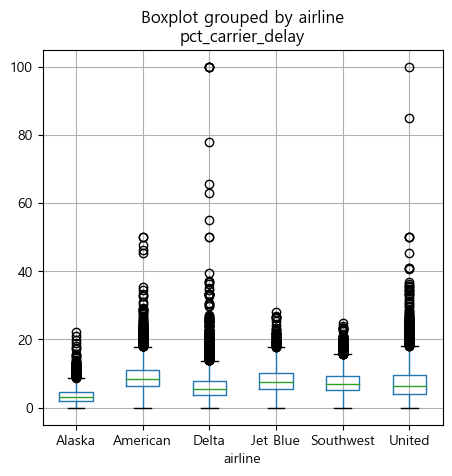

In [14]:
#범주형과 수치형 데이터 분포 확인
airline_stats = pd.read_csv('../0822/python_statistics-main/data/airline_stats.csv')
#airline_stats

ax = airline_stats.boxplot(by="airline", column="pct_carrier_delay",
                          figsize=(5,5))

<Axes: >

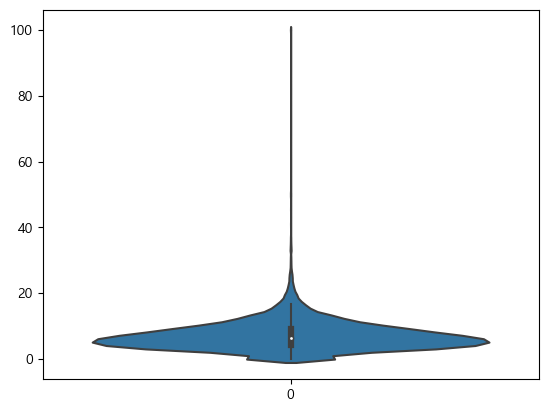

In [15]:
import seaborn as sns
sns.violinplot(airline_stats['pct_carrier_delay'])

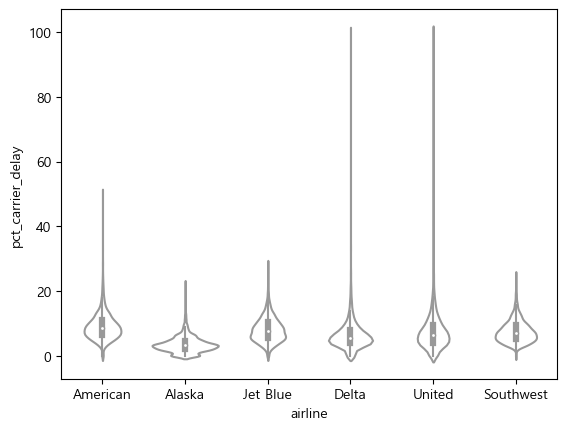

In [19]:
import seaborn as sns
sns.violinplot(data = airline_stats, x='airline', y = 'pct_carrier_delay',
               color='white')
plt.show()

## 일반적인 사람이 이 시약을 테스트한 결과 양성으로 나타난 경우 실제 이 병에 걸렸을 확률은 ?

In [29]:
#병에 걸릴 확률과 병에 걸리지 않을 확률을 생성
from pgmpy.factors.discrete import TabularCPD

cpd_X = TabularCPD('X', 2, [[0.998], [0.002]])
print(cpd_X)

+------+-------+
| X(0) | 0.998 |
+------+-------+
| X(1) | 0.002 |
+------+-------+


In [34]:
#진단 시약의 판단 여부를 대입해서 확률 모형을 생성
#정상인 경우 정상으로 판단 95% 잘못판단 5%
# 병에 걸린 경우 병에 걸리지 않았다고 판단 : 1%, 양성으로 판단: 99%
cpd_on_X = TabularCPD('Y', 2, np.array([[0.95, 0.01], [0.05, 0.99]]),
                     evidence=['X'],evidence_card=[2])
print(cpd_on_X)

#모델 생성
from pgmpy.models import BayesianModel
model = BayesianModel([('X', 'Y')])
model.add_cpds(cpd_X, cpd_on_X)
#모델이 정상적으로 만들어졌는지 확인
print(model.check_model())

#양성으로 나왔을 때 확률
from pgmpy.inference import VariableElimination
inference = VariableElimination(model)
#Y값이 1이면 양성으로 나왔을 때 병에 걸리지 않았을 확률과 병에 걸릴 확률
#Y값이 0이면 음성으로 나왔을 때 병에 걸리지 않았을 확률과 병에 걸릴 확률
print(inference.query(['X'], evidence={'Y': 1}))

+------+------+------+
| X    | X(0) | X(1) |
+------+------+------+
| Y(0) | 0.95 | 0.01 |
+------+------+------+
| Y(1) | 0.05 | 0.99 |
+------+------+------+
True
+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.9618 |
+------+----------+
| X(1) |   0.0382 |
+------+----------+


In [ ]:
import seaborn as sns
import scipy as sp
import scipy.stats

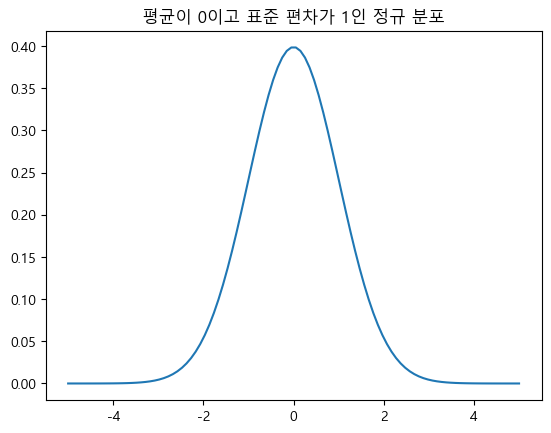

In [36]:
#정규 분포 만들기

# 평균과 표준 편차
mu = 0 #평균은 0
std = 1 # 표준편차는 1
rv = sp.stats.norm(mu, std)#정규 분포 갹체 생성
xx = np.linspace(-5, 5, 100) #샘플 데이터 100개를 생성

plt.plot(xx, rv.pdf(xx))
plt.title('평균이 0이고 표준 편차가 1인 정규 분포')
plt.show()

In [37]:
#샘플링
x = rv.rvs(100)
print(x)

[ 0.432  1.525  1.304  0.141 -1.204  0.177 -1.15  -0.995  1.718 -0.324
  1.057 -0.435  0.661 -1.392 -0.469 -0.898  0.149 -1.288  1.483  0.279
  1.347  1.241 -0.763 -0.522  1.146 -0.286  0.215  1.126 -1.343 -2.019
  0.492 -0.263  1.622  2.156 -0.66   0.834  0.541  1.846  0.499 -0.591
  0.503 -0.019  0.587 -0.903 -0.473 -0.57   1.007  0.546  0.897  0.635
  0.595  1.105 -2.126 -0.011 -1.719  0.069 -1.91   0.106 -0.041  0.462
  1.132  0.243  0.018  0.292  1.26   0.229  0.575  0.41  -0.045  0.025
 -1.047  1.243  0.537  1.82  -0.739 -0.462 -0.392 -0.746 -0.025 -0.047
  1.397  0.756 -0.403 -0.616  2.005 -1.475  0.75   0.117 -0.057 -2.497
 -1.197 -1.375 -1.063 -1.795  0.948 -1.119 -0.668  0.915 -1.048  0.546]


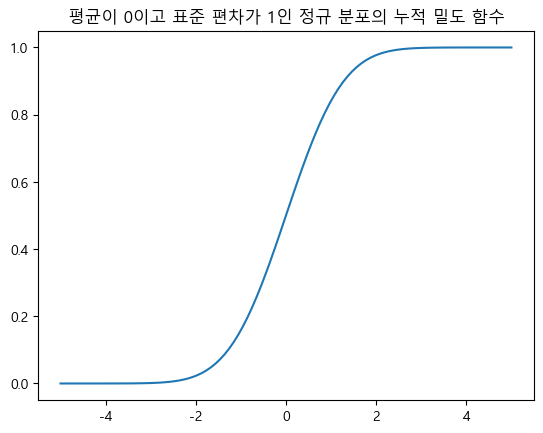

In [38]:
#누적 밀도 함수
plt.plot(xx, rv.cdf(xx))
plt.title('평균이 0이고 표준 편차가 1인 정규 분포의 누적 밀도 함수')
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163 entries, 2010-01-01 to 2023-07-01
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SPASTT01USM661N  163 non-null    float64
 1   SPASTT01JPM661N  163 non-null    float64
 2   SPASTT01EZM661N  163 non-null    float64
 3   SPASTT01KRM661N  163 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


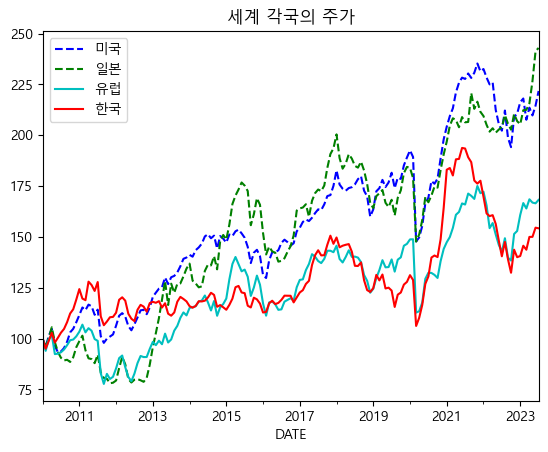

In [47]:
import pandas_datareader.data as web
import datetime

#날짜 설정
start = datetime.datetime(2023,1,1)
end = datetime.datetime(2023,8,22)

#가져올 국가의 주가 지수 코드
symbols=['SPASTT01USM661N','SPASTT01JPM661N','SPASTT01EZM661N','SPASTT01KRM661N']

data = pd.DataFrame()

for symbol in symbols:
    data[symbol] = web.DataReader(symbol, data_source='fred',
                                 start='2010-01-01', end='2023-08-22')[symbol]
    
       
print(data.info())

data.columns =['미국', '일본', '유럽', '한국']
data = data/data.iloc[0] *100
styles = ['b--', 'g--', 'c', 'r-']
data.plot(style=styles)
plt.title('세계 각국의 주가')
plt.show() 

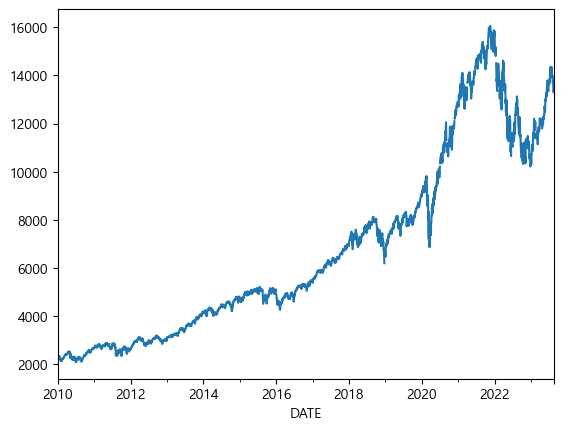

In [48]:
data = pd.DataFrame()
symbol = "NASDAQCOM"

data[symbol] = web.DataReader(symbol, data_source='fred',
                                 start='2010-01-01', end='2023-08-22')[symbol]

data.plot(legend=False)
plt.show()

            NASDAQCOM
DATE                 
2010-01-05  1.256e-04
2010-01-06 -3.301e-03
2010-01-07 -4.520e-04
2010-01-08  7.443e-03
2010-01-11 -2.054e-03
...               ...
2023-08-15 -1.141e-02
2023-08-16 -1.148e-02
2023-08-17 -1.170e-02
2023-08-18 -1.964e-03
2023-08-21  1.556e-02

[3555 rows x 1 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_15888\1545305515.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(daliy_returns, kde=False)


<Axes: >

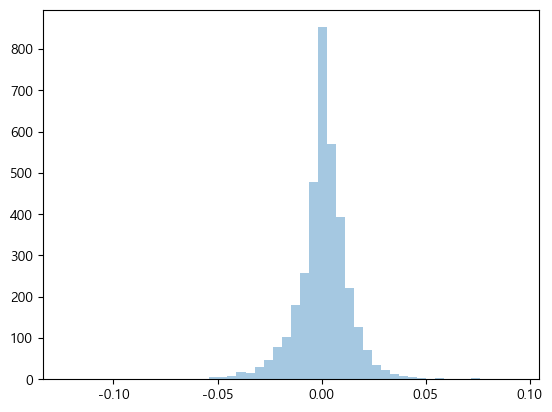

In [51]:
#일차별 차이
daliy_returns = data.pct_change().dropna()
print(daliy_returns)

#일차별 차이를 그래프로 출력 - 정규 분포와 유사한 그래프가 그려짐
sns.distplot(daliy_returns, kde=False)

In [53]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yfin

yfin.pdr_override()
#주식 코드만 변경하면 주가 정보를 가져올 수 있음
samsung = web.get_data_yahoo("005380.KS")
print(samsung)

[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close   Adj Close   Volume
Date                                                                   
2000-01-04   19000.0   20700.0   18600.0   20700.0   12360.332  2028300
2000-01-05   21000.0   22500.0   19500.0   20800.0   12420.044  4091600
2000-01-06   21300.0   21700.0   19100.0   19700.0   11763.211  1899300
2000-01-07   20900.0   21100.0   20000.0   20300.0   12121.481  2206900
2000-01-10   21500.0   21600.0   19750.0   20000.0   11942.350  1931800
...              ...       ...       ...       ...         ...      ...
2023-08-17  184900.0  185500.0  182600.0  184800.0  184800.000   458036
2023-08-18  182600.0  187500.0  182600.0  186100.0  186100.000   420787
2023-08-21  187000.0  187200.0  185300.0  186100.0  186100.000   279766
2023-08-22  186200.0  187900.0  186200.0  187900.0  187900.000   297596
2023-08-23  186500.0  188700.0  186000.0  187100.0  187100.000   14

C:\Users\user\AppData\Local\Temp\ipykernel_15888\3046293710.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, kde=False, ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_15888\3046293710.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, kde=False, ax=ax[1])


<Axes: >

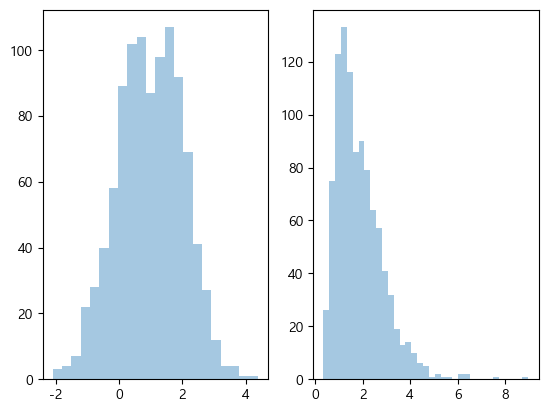

In [55]:
#정규 분포 와 로그 정규 분포 모형 비교 
mu = 1
rv = sp.stats.norm(loc=mu)

x1 = rv.rvs(1000)
s = 0.5
x2 = np.exp(s * x1)

fig, ax = plt.subplots(1, 2)
sns.distplot(x1, kde=False, ax=ax[0])
sns.distplot(x2, kde=False, ax=ax[1])

C:\Users\user\AppData\Local\Temp\ipykernel_15888\892720937.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_poisson,


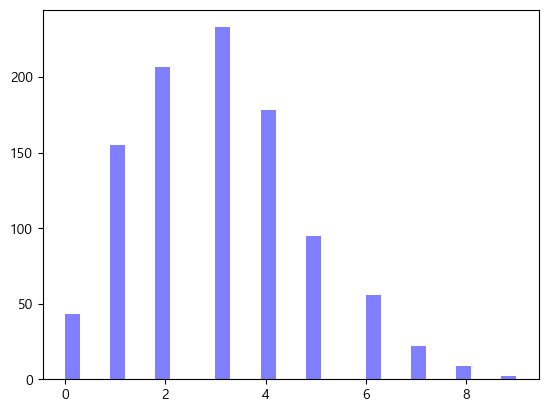

In [58]:
#포아송 분포
data_poisson = sp.stats.poisson.rvs(mu=3, size=1000)
#print(data_poisson)

ax = sns.distplot(data_poisson,
bins=30,
color='blue',
kde=False,
hist_kws={'linewidth':1, 'alpha':0.5})
plt.show()

In [59]:
import random

#데이터 접근
li = [10, 20, 30, 40, 50]

#복원 추출
for i in range(5):
    print(li[random.randint(0, len(li)-1)])
    
#비복원 추출 - li에서 복원하지 않고 5개 추출
result = random.sample(li, k=5)
print(result)

20
40
20
20
40
[50, 10, 20, 30, 40]


In [68]:
ar = ['오미크론', '다크스펙터', '나즈', '라투', '위치']
#복원추출
print(np.random.choice(ar, 5))
#8:2 비복원 추출 - 일반적인 머신러닝에서 훈련 데이터와 검증 데이터 분리
sample = np.random.choice(ar, int(len(ar) * 0.8), replace=False)
print(sample)
validation=[]

#데이터를 순회하면서 속하지 않는 데이터만 validation에 추가
for i in ar:
    if i not in sample:
        validation.append(i)
print(validation)

['나즈' '위치' '위치' '위치' '라투']
['위치' '라투' '나즈' '다크스펙터']
['오미크론']


In [69]:
#가중치를 부여한 샘플 추출 - 층화 추출
#분류 분석에서 이 속성이 Target으로 사용되는 경우에는
#데이터의 개수를 파악한 후 층화 추출을 고려해야 함
print(np.random.choice(ar, 5, p=[0.1, 0.1, 0.2, 0.2, 0.4]))

['오미크론' '다크스펙터' '다크스펙터' '나즈' '다크스펙터']


In [78]:
#DataFrame에서의 샘플링
ex_df = pd.DataFrame(np.arange(0,12).reshape(4,3))
print(ex_df)

#10개의 데이터 샘플링
print(ex_df.sample())

print(ex_df.sample(frac=0.8))

   0   1   2
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11
   0  1  2
0  0  1  2
   0  1  2
2  6  7  8
1  3  4  5
0  0  1  2


In [88]:
X = np.arange(20).reshape(10,2)
print(X)

y=np.arange(10)
print(y)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]
[0 1 2 3 4 5 6 7 8 9]


In [89]:
#순차적 분할 - 데이터를 순서대로 분할 : shuffle 옵션을 False로 성정
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                   shuffle=False,
                                                   random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_train)

(7, 2)
(3, 2)
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]]


In [90]:
#랜덤 추출
#랜덤 추출을 할 때 이를 가지고 실제 훈련에 사용한다면 시드는 고정을 시켜야 함
#시드를 고정시키지 않으면 선택된 데이터에 따란 다른 모델이 만들어지게 됨
#검증해야하는 덷이터도 랜덤하게 생성되므로 평가지표가 매번 달라지게 됨
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                   shuffle=False,
                                                   random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_train)

(7, 2)
(3, 2)
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]]


In [ ]:
#층화 무작위 추출
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                   shuffle=False,
                                                   random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_train)

In [91]:
#시드 고정
np.random.seed(104)

#데이터 불러오기
df = pd.read_csv('../0822/python_statistics-main/data/coffee_dataset.csv')
print(df.head())
df.info()

   user_id   age  drinks_coffee  height
0     4509   <21          False  64.538
1     1864  >=21           True  65.824
2     2060   <21          False  71.320
3     7875  >=21           True  68.569
4     6254   <21           True  64.020
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2974 non-null   int64  
 1   age            2974 non-null   object 
 2   drinks_coffee  2974 non-null   bool   
 3   height         2974 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 72.7+ KB


In [94]:
#200개의 데이터 샘츨링 
df_sample = df.sample(200)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 486 to 914
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        200 non-null    int64  
 1   age            200 non-null    object 
 2   drinks_coffee  200 non-null    bool   
 3   height         200 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB


In [95]:
#커피를 마시는 사람과 그렇지 않은 사람의 평균 키 차이

#반복 횟수
iterationNum = 10000

diffHeightList = []

for _ in range(iterationNum):
    bootSample = df_sample.sample(200, replace=True)#복원추출
    #커피를 마시지 않는 사람 평균 키
    nonCoffeeHeightMean = bootSample[bootSample['drinks_coffee'] == False].height.mean()
    # 커피를 마시는 사람 평균 키
    coffeeHeightMean = bootSample[bootSample['drinks_coffee'] == True].height.mean() 
    # 차이 구하기
    diff = nonCoffeeHeightMean - coffeeHeightMean
    #리스트에 추가
    diffHeightList.append(diff)
print(len(diffHeightList))
    
# 신뢰수준 99.5%인 평균 키 차이에 대한 신뢰구간
print(np.percentile(diffHeightList, 0.5), np.percentile(diffHeightList, 99.5))

10000
-3.1319975931075725 -0.7811253958264301


In [ ]:
#21세 이상과 21세 미만의 키 평균 차이
